In [26]:
#tensorflow_version 2.1

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [28]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.26.4
TensorFlow 2.18.0
Keras 3.8.0


In [29]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # % of samples that should be held for validation set
test_ratio = 0.2    # % of samples that should be held for test set
tflite_model_name = 'sine_model'    # Will be given .tflite suffix
c_model_name = 'sine_model'         # Will be given .h suffix

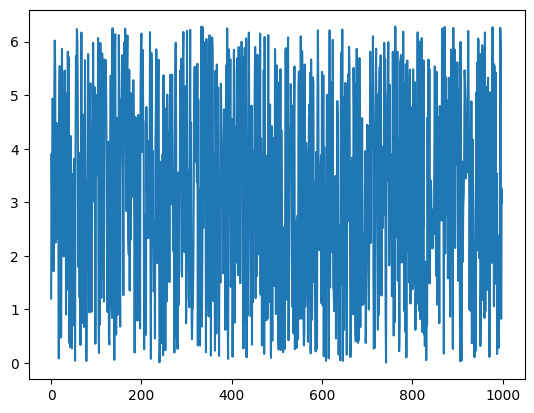

In [30]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

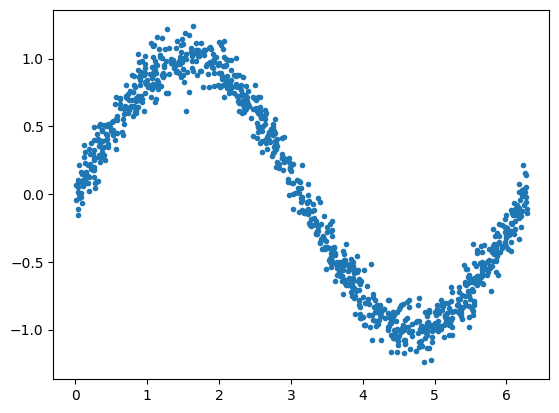

In [31]:
from re import X
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

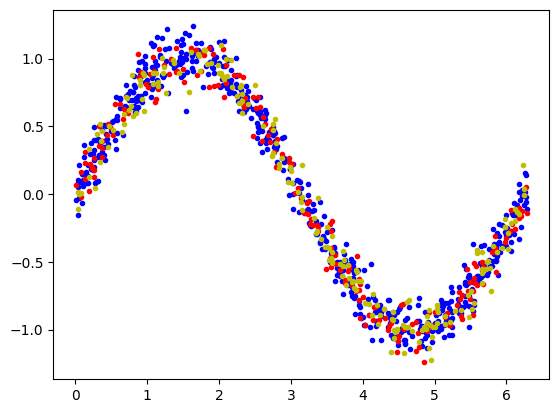

In [32]:
# Split the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, (val_split, test_split))

# Check that our splits add up to nsamples
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.show()

In [33]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# View model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [36]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6709 - mae: 0.6709 - val_loss: 0.5434 - val_mae: 0.5434
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5534 - mae: 0.5534 - val_loss: 0.5083 - val_mae: 0.5083
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5202 - mae: 0.5202 - val_loss: 0.4951 - val_mae: 0.4951
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5064 - mae: 0.5064 - val_loss: 0.4898 - val_mae: 0.4898
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5033 - mae: 0.5033 - val_loss: 0.4786 - val_mae: 0.4786
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4895 - mae: 0.4895 - val_loss: 0.4753 - val_mae: 0.4753
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4794 - mae: 0.4794 - val_loss: 0.4688 - val_mae: 0.4688
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4827 - mae: 0.4827 - val_loss: 0.4609 - val_mae: 0.4609
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4818 - mae: 0.4818 -

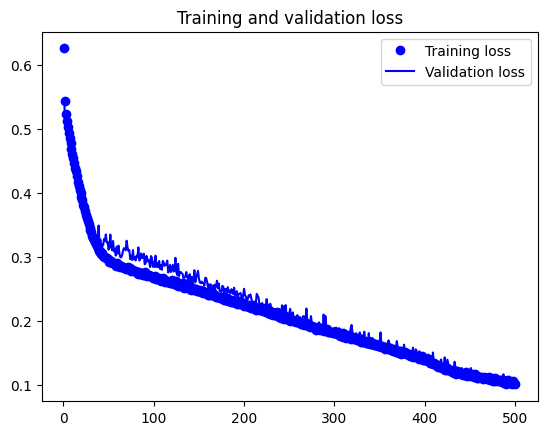

In [37]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


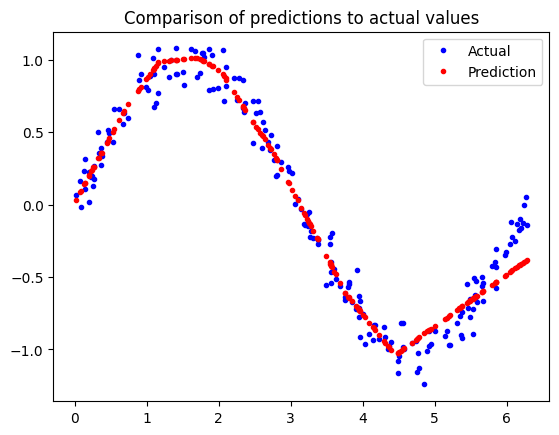

In [38]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()


In [39]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/m0/sy61p9pd6cv3911gnh8j7jmw0000gn/T/tmpdpq40gj7/assets


INFO:tensorflow:Assets written to: /var/folders/m0/sy61p9pd6cv3911gnh8j7jmw0000gn/T/tmpdpq40gj7/assets


Saved artifact at '/var/folders/m0/sy61p9pd6cv3911gnh8j7jmw0000gn/T/tmpdpq40gj7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  6219781072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6219782224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6219781840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6219782608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6219780112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6219781648: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1739913753.936386 5938446 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1739913753.936793 5938446 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1739913753.939864 5938446 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


3168

In [55]:
def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += 'unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data):

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif // ' + var_name.upper() + '_H'

    return c_str

In [57]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))